In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '{:,.3f}'.format(x) if abs(x)<0 else ('{:,.2f}'.format(x) if abs(x)<10 else ('{:,.1f}'.format(x) if abs(x)<100 else '{:,.0f}'.format(x))))

default_size = 18
plt.rc('font', size=default_size)
plt.rc('axes', titlesize=default_size)     # fontsize of the axes title
plt.rc('axes', labelsize=default_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=default_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=default_size)    # legend fontsize
plt.rc('figure', titlesize=default_size)

color_h2 = 'lightblue'

color_life = 'blue'
color_atm_life ='dodgerblue'

color_atm_prod = 'teal'
color_atm_loss = 'goldenrod'
color_drydep = 'brown'
color_emis = 'orangered'


model_dict = { 'OSLOCTM3':'OsloCTM',
               'WACCM6-2deg':'WACCM',
               'INCA':'INCA',
               'GFDL-emi':'GFDL-emi',
               'GFDL_nudge':'GFDL',
               'UKCA':'UKCA',
               'OSLOCTM3-emi':'OsloCTM-emi'}

sorted_array = ['GFDL','OsloCTM','INCA','UKCA','WACCM','GFDL-emi','OsloCTM-emi','Model mean']

starplot = False

In [2]:
filepath= r"./output/"
df_budget = pd.read_csv(filepath+'table_budget_h2.csv',index_col=0)


df_budget.rename(model_dict, inplace=True)

df_budget.loc['Model mean'] = df_budget.drop(['GFDL-emi','OsloCTM-emi']).mean()

df_budget = df_budget.reindex(sorted_array)
df_budget

,H2 burden [Tg],H2 atm loss [Tg/yr],H2 atm prod [Tg/yr],H2 soil sink [Tg/yr],H2 estimated emissions [Tg/yr],H2 atm lifetime [yrs],H2 soil sink lifetime [yrs],H2 total lifetime [yrs]
GFDL,188,21.7,45.0,56.6,33.3,8.66,3.32,2.40
OsloCTM,196,28.4,56.3,59.5,31.6,6.91,3.30,2.23
INCA,195,22.5,47.1,52.0,27.3,8.66,3.74,2.61
UKCA,191,26.8,49.4,54.7,32.0,7.15,3.50,2.35
WACCM,195,29.0,33.9,73.0,68.1,6.70,2.67,1.91
GFDL-emi,192,22.3,45.1,54.6,31.9,8.62,3.52,2.50
OsloCTM-emi,209,30.1,56.2,58.4,32.2,6.95,3.58,2.36
Model mean,193,25.7,46.4,59.1,38.5,7.62,3.30,2.30


In [3]:
df_budget.loc['Emission driven:'] = np.empty(8)*np.nan
df_budget.loc[''] = np.empty(8)*np.nan
df_budget=df_budget.reindex(['GFDL','OsloCTM','INCA','UKCA','WACCM','','Model mean','Emission driven:','GFDL-emi','OsloCTM-emi'])
xlabels = ['GFDL','OsloCTM','INCA','UKCA','WACCM','','Model mean','','GFDL-emi','OsloCTM-emi']

Estimate drydeposition values based on best availible H2 emissions and the model mean og H2 atmospheric production and atmospheric loss.

In [4]:
val1 = 'H2 atm loss [Tg/yr]'
val2 = 'H2 soil sink [Tg/yr]'
val3 = 'H2 atm prod [Tg/yr]'
val4 = 'H2 estimated emissions [Tg/yr]'
    
atmloss = df_budget[val1].loc['Model mean']
atmprod = df_budget[val3].loc['Model mean']
#drydep = 65.0
#emis = drydep + atmloss - atmprod
emis = 38. #df_budget[val4].loc['GFDL-emi']
drydep = emis + atmprod - atmloss
drydep

58.695422112111416

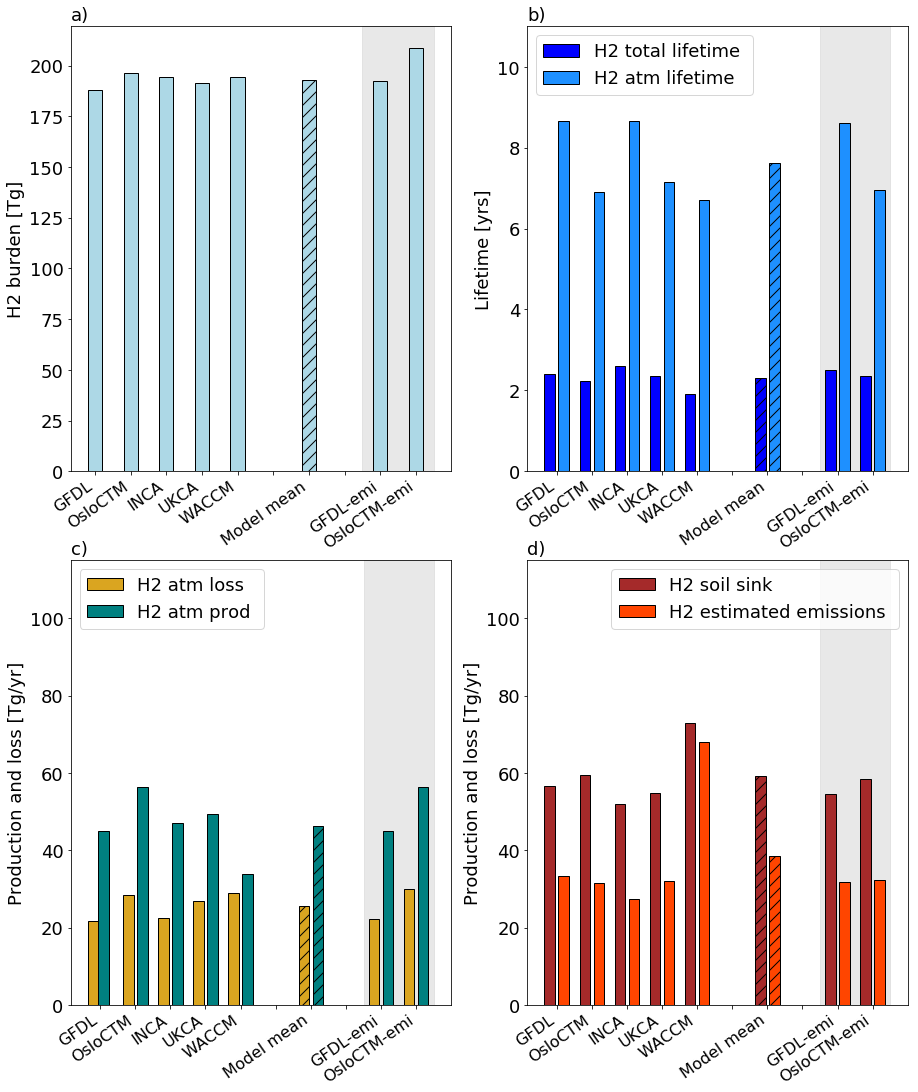

In [5]:
fig, axs = plt.subplots(nrows=2,ncols=2,squeeze=True,figsize=(15,18),sharey=False)
axs=axs.flatten()


#Burden:
plot_values = df_budget['H2 burden [Tg]']
for m,model in enumerate(df_budget.index):
   
    if model == 'Model mean':
        axs[0].bar(m,plot_values.loc[model],width=0.4,hatch='//',edgecolor='black',color=color_h2)
    else:
        axs[0].bar(m,plot_values.loc[model],width=0.4,edgecolor='black',color=color_h2)   

axs[0].set_xticks(np.arange(0,len(plot_values.index)))
axs[0].set_xticklabels(xlabels, rotation=35,horizontalalignment="right")



#Lifetime
for m,model in enumerate(df_budget.index):
    val1 = 'H2 total lifetime [yrs]'
    val2 = 'H2 atm lifetime [yrs]'
    if m == 0:
        axs[1].bar(m-0.2,df_budget[val1].loc[model],width=0.3,color=color_life,edgecolor='black',label=val1.split('[')[0])
        axs[1].bar(m+0.2,df_budget[val2].loc[model],width=0.3,color=color_atm_life,edgecolor='black',label=val2.split('[')[0])
   
    elif model == 'Model mean':
        axs[1].bar(m-0.2,df_budget[val1].loc[model],width=0.3,hatch='//',color=color_life,edgecolor='black')
        axs[1].bar(m+0.2,df_budget[val2].loc[model],width=0.3,hatch='//',color=color_atm_life,edgecolor='black')    
    else:
        axs[1].bar(m-0.2,df_budget[val1].loc[model],width=0.3,color=color_life,edgecolor='black')
        axs[1].bar(m+0.2,df_budget[val2].loc[model],width=0.3,color=color_atm_life,edgecolor='black')    

axs[1].set_xticks(np.arange(0,len(plot_values.index)))
axs[1].set_xticklabels(xlabels, rotation=35,horizontalalignment="right")
axs[1].legend()

#Prod and loss

for m,model in enumerate(df_budget.index):
    val1 = 'H2 atm loss [Tg/yr]'
    val2 = 'H2 soil sink [Tg/yr]'
    val3 = 'H2 atm prod [Tg/yr]'
    val4 = 'H2 estimated emissions [Tg/yr]'
    if m == 0:
        axs[2].bar(m-0.2,df_budget[val1].loc[model],width=0.3,color=color_atm_loss,edgecolor='black',label=val1.split('[')[0])
        axs[3].bar(m-0.2,df_budget[val2].loc[model],width=0.3,color=color_drydep,edgecolor='black',label=val2.split('[')[0])
        axs[2].bar(m+0.1,df_budget[val3].loc[model],width=0.3,color=color_atm_prod,edgecolor='black',label=val3.split('[')[0])
        axs[3].bar(m+0.2,df_budget[val4].loc[model],width=0.3,color=color_emis,edgecolor='black',label=val4.split('[')[0]) 
    elif model == 'Model mean':
        axs[2].bar(m-0.2,df_budget[val1].loc[model],width=0.3,hatch='//',color=color_atm_loss,edgecolor='black')
        axs[3].bar(m-0.2,df_budget[val2].loc[model],width=0.3,hatch='//',color=color_drydep,edgecolor='black')
        axs[2].bar(m+0.2,df_budget[val3].loc[model],width=0.3,hatch='//',color=color_atm_prod,edgecolor='black')
        axs[3].bar(m+0.2,df_budget[val4].loc[model],width=0.3,hatch='//',color=color_emis,edgecolor='black')  
        add_one = 1
    else:
        axs[2].bar(m-0.2,df_budget[val1].loc[model],width=0.3,color=color_atm_loss,edgecolor='black')
        axs[3].bar(m-0.2,df_budget[val2].loc[model],width=0.3,color=color_drydep,edgecolor='black')
        axs[2].bar(m+0.2,df_budget[val3].loc[model],width=0.3,color=color_atm_prod,edgecolor='black')
        axs[3].bar(m+0.2,df_budget[val4].loc[model],width=0.3,color=color_emis,edgecolor='black')  
                   
            
axs[2].set_xticks(np.arange(0,len(plot_values.index)))
axs[2].set_xticklabels(xlabels, rotation=35,horizontalalignment="right")

axs[3].set_xticks(np.arange(0,len(plot_values.index)))
axs[3].set_xticklabels(xlabels, rotation=35,horizontalalignment="right")


 
    
    
#Shadeing behind the emission driven runs
axs[0].axvspan(7.5, 9.5, alpha=0.5, color='lightgray',zorder=-10)
axs[1].axvspan(7.5, 9.5, alpha=0.5, color='lightgray',zorder=-10)
axs[2].axvspan(7.5, 9.5, alpha=0.5, color='lightgray',zorder=-10)
axs[3].axvspan(7.5, 9.5, alpha=0.5, color='lightgray',zorder=-10)

#Set ylim and ylabels:
axs[0].set_ylabel('H2 burden [Tg]')

axs[1].set_ylim([0,11])
axs[1].set_ylabel('Lifetime [yrs]')

axs[2].set_ylim([0,115])
axs[2].set_ylabel('Production and loss [Tg/yr]')


axs[3].set_ylim([0,115])
axs[3].set_ylabel('Production and loss [Tg/yr]')

#Set a) to d)
axs[0].set_title('a)',loc='left')
axs[1].set_title('b)',loc='left')
axs[2].set_title('c)',loc='left')
axs[3].set_title('d)',loc='left')


#Add the best estimate:
if starplot: axs[3].plot(6+0.2,emis,'*',markersize=12,color='darkgray',label='Best estimate')
if starplot: axs[3].plot(6-0.2,drydep,'*',markersize=12,color='darkgray')



axs[2].legend()
axs[3].legend()  